# Coupons Challenge for Kueski Data Science Position
https://www.kaggle.com/c/coupon-purchase-prediction/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import codecs
import dateparser

from pprint import pprint
from random import randint
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

## Translation Japansese - English

In [2]:
with codecs.open('data/translations.json', 'r') as f:
    translations = json.load(f)

def translate(jpn_word):
    try:
        return translations[jpn_word]
    except:
        return jpn_word

In [3]:
translations

{'WEBサービス': 'Web service',
 'さいたま市': 'Saitama',
 'その他': 'Other',
 'その他のクーポン': 'Other coupon',
 'イベント': 'Event',
 'エステ': 'Spa',
 'キタ': 'Northern',
 'ギフトカード': 'Gift card',
 'グルメ': 'Food',
 'ゲストハウス': 'Guest house',
 'ネイル・アイ': 'Nail and eye salon',
 'ビューティ': 'Beauty',
 'ビューティー': 'Beauty',
 'ヘアサロン': 'Hair salon',
 'ペンション': 'Resort inn',
 'ホテル': 'Hotel',
 'ホテル・旅館': 'Hotel and Japanese hotel',
 'ミナミ他': 'Minami other',
 'リラクゼーション': 'Relaxation',
 'レジャー': 'Leisure',
 'レッスン': 'Lesson',
 'ロッジ': 'Lodge',
 '三重': 'Triple',
 '三重県': 'Mie',
 '中国': 'China',
 '九州・沖縄': 'Kyushu-Okinawa',
 '京都': 'Kyoto',
 '京都市': 'Kyoto City',
 '京都府': 'Kyoto',
 '仙台市': 'Sendai',
 '佐賀': 'Saga',
 '佐賀市': 'Saga',
 '佐賀県': 'Saga Prefecture',
 '健康・医療': 'Health and medical',
 '公共の宿': 'Public hotel',
 '兵庫': 'Hyogo',
 '兵庫県': 'Hyogo Prefecture',
 '前橋市': 'Maebashi',
 '北信越': 'Hokushinetsu',
 '北海道': 'Hokkaido',
 '千葉': 'Chiba',
 '千葉市': 'Chiba',
 '千葉県': 'Chiba Prefecture',
 '名古屋市': 'Nagoya city',
 '和歌山': 'Wakayama',
 '和歌山市': 'Wakayama',
 '和歌

## Reading and parsing of files using Pandas

Japanese cells are translated, as well

In [4]:
coupon_list_train = pd.read_csv('data/coupon_list_train.csv', index_col='COUPON_ID_hash')
coupon_list_train = coupon_list_train.apply(lambda row: row.apply(translate), axis=1)
coupon_list_train.head()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name
COUPON_ID_hash,,,,,,,,,,,,,,,,,,,,,
6b263844241eea98c5a97f1335ea82af,Food,Food,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Saitama Prefecture,Saitama
cc031f250e8bad1e24060263b9fc0ddd,Food,Food,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba
ba5e9b7453ca52ff711635a5d2e8102d,Food,Food,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba
3e1ffbedca3569f9e8032d401e8cb4e6,Food,Food,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba
782934b6c815b4030ea204eef7d4a734,Food,Food,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Chiba Prefecture,Chiba


In [5]:
user_list = pd.read_csv('data/user_list.csv', index_col='USER_ID_hash')
user_list = user_list.apply(lambda row: row.apply(translate), axis=1)
user_list.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME
USER_ID_hash,,,,,
d9dca3cb44bab12ba313eaa681f663eb,2012-03-28 14:14:18,f,25,NaN,NaN
560574a339f1b25e57b0221e486907ed,2011-05-18 00:41:48,f,34,NaN,Tokyo
e66ae91b978b3229f8fd858c80615b73,2011-06-13 16:36:58,m,41,NaN,Aichi Prefecture
43fc18f32eafb05713ec02935e2c2825,2012-02-08 12:56:15,m,25,NaN,NaN
dc6df8aa860f8db0d710ce9d4839840f,2011-05-22 23:43:56,m,62,NaN,Kanagawa Prefecture


In [6]:
coupon_visit_train = pd.read_csv('data/coupon_visit_train.csv')
coupon_visit_train.head()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN


In [7]:
coupon_area_train = pd.read_csv('data/coupon_area_train.csv')
coupon_area_train = coupon_area_train.apply(lambda row: row.apply(translate), axis=1)
coupon_area_train.head()

,SMALL_AREA_NAME,PREF_NAME,COUPON_ID_hash
0,Saitama,Saitama Prefecture,6b263844241eea98c5a97f1335ea82af
1,Chiba,Chiba Prefecture,cc031f250e8bad1e24060263b9fc0ddd
2,Chiba,Chiba Prefecture,ba5e9b7453ca52ff711635a5d2e8102d
3,Chiba,Chiba Prefecture,3e1ffbedca3569f9e8032d401e8cb4e6
4,Chiba,Chiba Prefecture,782934b6c815b4030ea204eef7d4a734


In [8]:
prefecture_locations = pd.read_csv('data/prefecture_locations.csv', index_col='PREF_NAME')
prefecture_locations = prefecture_locations.apply(lambda row: row.apply(translate), axis=1)
prefecture_locations.index = prefecture_locations.index.map(translate)
prefecture_locations.head()

,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE
PREF_NAME,,,
Hokkaido,Sapporo,43.063968,141.347899
Aomori Prefecture,Aomori,40.824623,140.740593
Iwate Prefecture,Morioka,39.703531,141.152667
Miyagi Prefecture,Sendai,38.268839,140.872103
Akita,Akita,39.718600,140.102334


In [7]:
coupon_detail_train = pd.read_csv('data/coupon_detail_train.csv')
coupon_detail_train = coupon_detail_train.apply(lambda row: row.apply(translate), axis=1)
coupon_detail_train.head()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash
0,1,2012-03-28 15:06:06,Hyogo,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a
1,1,2011-07-04 23:52:54,"Ginza Shinbashi, Tokyo, Ueno",1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7
2,1,2011-07-16 00:52:49,"Ebisu, Meguro Shinagawa",36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
3,1,2011-07-16 00:54:53,"Ebisu, Meguro Shinagawa",2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
4,1,2011-07-16 00:55:52,"Ebisu, Meguro Shinagawa",4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2


## Problem Definition

In [7]:
def get_time(datestring):
    date = datestring.split()[0]
    time = datestring.split()[1]
    time = [int(d) for d in time.split(':')]
    date = date.split('-')
    date_object = datetime(int(date[0]), int(date[1]), int(date[2]),
                           hour=time[0], minute=time[1], second=time[2])
    return date_object

In [11]:
avgs = []
for i in range(1000):
    stats = []
    delta = 2000
    lower_b = randint(0, len(coupon_visit_train) - delta)
    upper_b = lower_b + delta
    dates = [coupon_visit_train.I_DATE.iloc[i] for i in range(lower_b, upper_b)]
    times = list(map(lambda d: get_time(d), dates))
    diffs = [d.seconds / 60 for d in np.diff(times)]
    #std = np.std(times)
    #print(datetime.fromtimestamp(std))
    #stats = [datetime.fromtimestamp(t) for t in times]
    #stats = [conv.hour + (conv.minute / 60) for conv in stats]
    avgs.append(np.mean(diffs))

4.17025557126


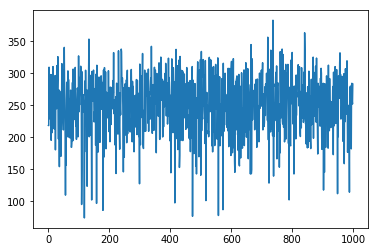

In [12]:
print(np.mean(avgs) / 60)
plt.plot(np.array(avgs))

In [8]:
date_vs_age = coupon_visit_train.join(user_list, on='USER_ID_hash')[['I_DATE', 'AGE', 'SEX_ID', 'USER_ID_hash']]
date_vs_age.I_DATE = date_vs_age.I_DATE.apply(lambda d: get_time(d))
date_vs_age[date_vs_age.SEX_ID == 'm'].tail(10)

,I_DATE,AGE,SEX_ID,USER_ID_hash
2832360,2012-06-06 22:54:26,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832361,2012-06-06 22:54:52,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832362,2011-09-20 22:38:40,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832363,2011-09-20 22:46:02,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832364,2011-09-20 22:52:40,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832365,2011-10-17 14:03:09,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832366,2011-10-17 14:05:16,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832367,2011-11-05 22:25:13,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832368,2011-11-06 21:58:09,41,m,6ae7811a9c7c58546d6a1567ab098c21
2832369,2011-11-06 22:03:39,41,m,6ae7811a9c7c58546d6a1567ab098c21


## Buying Success Ratio

$\frac{Purchases}{Visits}$

In [9]:
coupon_counter = coupon_visit_train.groupby(by=coupon_visit_train.USER_ID_hash).count()
ratio = coupon_counter.PURCHASEID_hash / coupon_counter.PURCHASE_FLG
ratio.name = 'SUCCESS_RATIO'
coupon_counter = coupon_counter.join(ratio)
coupon_counter.head(10)

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,SESSION_ID_hash,PURCHASEID_hash,SUCCESS_RATIO
USER_ID_hash,,,,,,,,
0000b53e182165208887ba65c079fc21,75,75,75,75,75,75,1,0.013333
00035b86e6884589ec8d28fbf2fe7757,2,2,2,2,2,2,1,0.500000
0005b1068d5f2b8f2a7c978fcfe1ca06,6,6,6,6,6,6,1,0.166667
000cc06982785a19e2a2fdb40b1c9d59,270,270,270,270,270,270,20,0.074074
0013518e41c416cd6a181d277dd8ca0b,29,29,29,29,29,29,4,0.137931
001acdee812a18acfd7509172bed5700,126,126,126,126,126,126,12,0.095238
001fd7876e3aa29393537c6baf308e43,24,24,24,24,24,24,1,0.041667
002383753c1e5d6305c8aff6f89e26d6,1,1,1,1,1,1,0,0.000000
0025cae7997d25ea5cf8851bb099c798,27,27,27,27,27,27,1,0.037037


In [10]:
dataset = date_vs_age.join(coupon_counter.SUCCESS_RATIO, on='USER_ID_hash')
dataset = dataset.sort_values(by=['I_DATE'])
dataset.index = range(len(dataset))
dataset.tail(20)

,I_DATE,AGE,SEX_ID,USER_ID_hash,SUCCESS_RATIO
2833160,2012-06-23 23:58:10,57,m,1915f71b987cc2d12cd73cad0407fbc1,0.023529
2833161,2012-06-23 23:58:12,51,m,e68036b1a425699e79dea4dfdce49b61,0.105960
2833162,2012-06-23 23:58:19,36,f,45893e96413bf1aedfff0f9f88e603b2,0.024955
2833163,2012-06-23 23:58:26,56,m,59e04d9ea42dc30a0040d007277af8b6,0.054422
2833164,2012-06-23 23:58:28,51,f,a43c1190148226472d445af6c972c6c0,0.000000
2833165,2012-06-23 23:58:31,51,f,9e3868ace7572f1c30859260272836e1,0.070858
2833166,2012-06-23 23:58:39,43,m,9bf07293ac2910cdcb3948cc8c11ed0f,0.000000
2833167,2012-06-23 23:58:51,45,m,a8da1d25347f5e3d850a1404a47c4224,0.081633
2833168,2012-06-23 23:58:54,51,f,14698436d0cba381e167b952c101afcd,0.103529
2833169,2012-06-23 23:58:59,48,f,d2932a2e91380285c9321f6bdaca6a76,0.035623


In [ ]:
dataset.I_DATE[0]

In [11]:
batches = {}
curr_day = 
for _, row in dataset.iterrows():
    

<generator object DataFrame.iterrows at 0x16923e8e0>

In [13]:
X = dataset.as_matrix()[:, :-2]
Y = dataset.as_matrix()[:, -1]

In [118]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [15]:
# Process sex_id
enc = OneHotEncoder()
sexes = enc.fit_transform(np.expand_dims(X[:, 2], 1)).toarray()

In [127]:
# Process age
age_scaler = MinMaxScaler()
age_scaler.fit(np.expand_dims(X[:, 1], 1))
ages = age_scaler.fit_transform(np.expand_dims(X[:, 1], 1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [129]:
# Process i_date
time_scaler = MinMaxScaler()
time_scaler.fit(np.expand_dims(X[:, 1], 1))
times = time_scaler.fit_transform(np.expand_dims(X[:, 0], 1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
X_train = np.hstack([times, ages, sexes])
X_train = X_train[:int(2833180 * (6/7)), :]
Y_train = np.expand_dims(Y[:int(2833180 * (6/7))], 1)
X_train.shape, Y_train.shape

((2428440, 4), (2428440, 1))

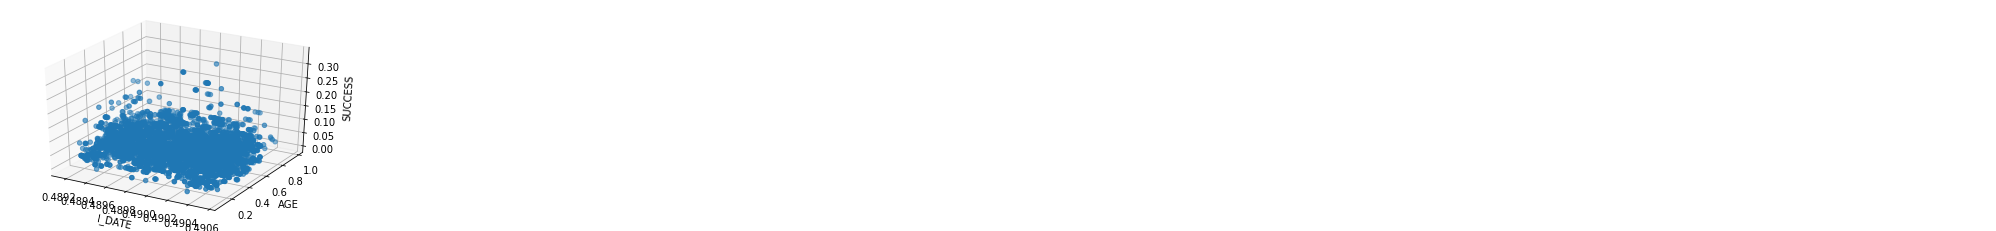

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
delta = 1050
ax.scatter(X_train[1250*delta:1255*delta, 0],
           X_train[1250*delta:1255*delta, 1],
           (Y_train[1250*delta:1255*delta, 0]))
ax.set_xlabel('I_DATE')
ax.set_ylabel('AGE')
ax.set_zlabel('SUCCESS')
plt.savefig('data.png')
plt.show()

In [119]:
regr = RandomForestRegressor()

In [121]:
regr.fit(X_train[1250*delta:1255*delta, ], Y_train[1250*delta:1255*delta, ])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
dataset[1250*delta:1255*delta].head()

,I_DATE,AGE,SEX_ID,USER_ID_hash,SUCCESS_RATIO
1312500,2011-12-23 13:32:52,39,m,795a26b72ccf92daf48596cf904ab9a8,0.022026
1312501,2011-12-23 13:32:54,54,f,076555595d9e7dabfce300df84948582,0.020742
1312502,2011-12-23 13:32:58,53,m,1a75711a0866c9484d9cb2c958d5406d,0.013233
1312503,2011-12-23 13:32:59,29,m,6d18aa51865bbb759763a4cba3d92869,0.017699
1312504,2011-12-23 13:32:59,37,f,6c11d2c21f73e066a097d28bfe101bcd,0.018824


In [157]:
test = np.array([time_scaler.transform([[get_time('2011-12-23 15:32:59').timestamp()]]),
                 age_scaler.transform([[29]])]).squeeze()
test = np.hstack([test, enc.transform([['m']]).toarray().squeeze()])
regr.predict([test])

array([ 0.03996654])